# Clasificación de mensajes de texto con Naive Bayes  

In [93]:
import pandas as pd
import numpy as np
import nltk
import re
import io
import pickle
from sklearn.feature_extraction.text import  CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from scipy.sparse import csr_matrix
from scipy import sparse
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/aulae1/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/aulae1/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [94]:
def generatingWordCloud(text):
    wordcloud = WordCloud(width=800, height=800,background_color='white', min_font_size=10).generate(str(text))  
    #%matplotlib inline
    plt.figure(figsize=(6, 6), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

### Recolección del conjunto de datos

### Recolección del conjunto de datos

In [95]:
sms = pd.read_csv("sms_spam.csv")
sms.head()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Exploración y preprocesamiento de los datos

In [96]:
print("Tamaño del dataset")
print("Número de ejemplos: " + str(sms.shape[0]))
print("Número de características: " + str(sms.shape[1]))

Tamaño del dataset
Número de ejemplos: 5574
Número de características: 2


In [97]:
def wordsCleaning(sms_text): ## ********************** CHECAR ESTO  ****************##
    sms_text = sms_text.str.replace('[^\w\s]','') #Remove punctuation
    sms_text = sms_text.str.replace('[0-9]','') #Remove any numbers 
    sms_text = sms_text.map(lambda x: x.lower())  #Convert all SMS messages to lowercase
    sms_text = sms_text.apply(nltk.word_tokenize) 
    nltk_words = list(stopwords.words('english')) #List of stopwords in english
    for i in range(0,len(sms_text)):
        sms_text[i] = [w for w in sms_text[i] if w not in nltk_words]  
    sms_text = sms_text.apply(lambda x: ' '.join(x)) # This converts the list of words into space-separated strings
    return sms_text

In [98]:
print(sms)

      type                                               text
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5569  spam  This is the 2nd time we have tried 2 contact u...
5570   ham               Will ü b going to esplanade fr home?
5571   ham  Pity, * was in mood for that. So...any other s...
5572   ham  The guy did some bitching but I acted like i'd...
5573   ham                         Rofl. Its true to its name

[5574 rows x 2 columns]


In [99]:
sms['text'] = wordsCleaning(sms['text'])
sms.head()

,type,text
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry wkly comp win fa cup final tkts st ...
3,ham,u dun say early hor u c already say
4,ham,nah dont think goes usf lives around though


In [100]:
print("Numero de ejemplos positivos y de ejemplos negativos: ")
print(sms["type"].value_counts()) 

Numero de ejemplos positivos y de ejemplos negativos: 
ham     4827
spam     747
Name: type, dtype: int64


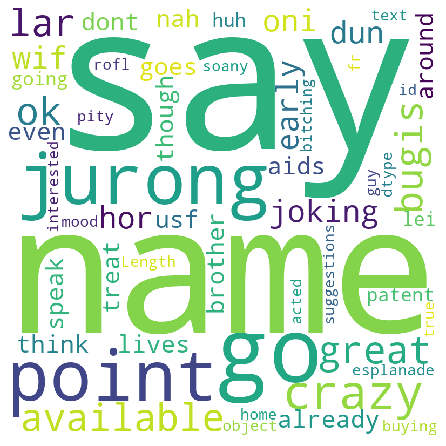

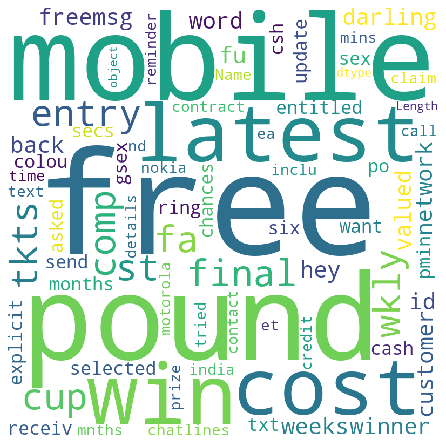

In [101]:
generatingWordCloud(sms.loc[sms['type'] == 'ham'].text)
generatingWordCloud(sms.loc[sms['type'] == 'spam'].text)

In [102]:
#Create the vector space model (Bag of words)
count_vect = CountVectorizer()
bagofWords = count_vect.fit_transform(sms['text'])
print('Tamaño del modelo de espacio vectorial con todas las palabras: ')
print(bagofWords.shape)

Tamaño del modelo de espacio vectorial con todas las palabras: 
(5574, 8482)


In [103]:
#Create the vector space model (Bag of words) with space reduction, with words that appear in more than five messages.
count_vect = CountVectorizer(min_df = 10)
bagofWords = count_vect.fit_transform(sms['text'])
print('Tamaño del modelo de espacio vectorial con las palabras que aparecen en más de 5 mensajes: ')
print(bagofWords.shape)

Tamaño del modelo de espacio vectorial con las palabras que aparecen en más de 5 mensajes: 
(5574, 856)


In [104]:
type(bagofWords)

scipy.sparse.csr.csr_matrix

In [105]:
print(bagofWords)

  (0, 272)	1
  (0, 551)	1
  (0, 140)	1
  (0, 42)	1
  (0, 283)	1
  (0, 829)	1
  (0, 281)	1
  (0, 786)	1
  (1, 500)	1
  (1, 361)	1
  (1, 808)	1
  (2, 245)	1
  (2, 207)	2
  (2, 820)	1
  (2, 122)	1
  (2, 811)	1
  (2, 144)	1
  (2, 231)	1
  (2, 666)	1
  (2, 422)	1
  (2, 698)	1
  (2, 583)	1
  (2, 746)	1
  (2, 30)	1
  (3, 189)	1
  :	:
  (5569, 528)	1
  (5569, 562)	1
  (5569, 109)	1
  (5569, 81)	1
  (5569, 473)	1
  (5569, 737)	1
  (5569, 718)	1
  (5569, 129)	1
  (5569, 438)	1
  (5569, 193)	1
  (5570, 319)	1
  (5570, 276)	1
  (5570, 244)	1
  (5572, 245)	1
  (5572, 331)	1
  (5572, 381)	1
  (5572, 793)	1
  (5572, 481)	1
  (5572, 762)	1
  (5572, 655)	1
  (5572, 198)	1
  (5572, 262)	1
  (5572, 288)	1
  (5573, 471)	1
  (5573, 739)	1


In [106]:
X_train, X_test, y_train, y_test = train_test_split(bagofWords, sms['type'], test_size=0.2, random_state=42)

### Entrenamiento del modelo

In [107]:
bayes = MultinomialNB()
bayes.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### Evaluación del desempeño del modelo

In [108]:
train_accuracy = bayes.score(X_train,y_train)
print('Accuracy de los datos de entrenamiento: ' + str(train_accuracy))
test_accuracy = bayes.score(X_test,y_test)
print('Accuracy de los datos de prueba: ' + str(test_accuracy))

Accuracy de los datos de entrenamiento: 0.9798161022650819
Accuracy de los datos de prueba: 0.9713004484304932


In [109]:
y_pred = bayes.predict(X_test)
print('Matriz de confusión')
print(pd.crosstab(y_test, y_pred, rownames = ['True'], colnames = ['Predicted'], margins = True))
print("----------------------------------------------------- ")
print('Metricas de clasificación')
print(classification_report(y_test,y_pred))

Matriz de confusión
Predicted  ham  spam   All
True                      
ham        937    17   954
spam        15   146   161
All        952   163  1115
----------------------------------------------------- 
Metricas de clasificación
              precision    recall  f1-score   support

         ham       0.98      0.98      0.98       954
        spam       0.90      0.91      0.90       161

    accuracy                           0.97      1115
   macro avg       0.94      0.94      0.94      1115
weighted avg       0.97      0.97      0.97      1115



### Almacenamiento del modelo

In [110]:
filename = 'spam_filter.sav'
pickle.dump(bayes, open(filename, 'wb'))

In [111]:
filename = 'bagofwords.sav'
pickle.dump(count_vect, open(filename, 'wb'))

### Probando el modelo en datos nunca antes vistos

In [112]:
model_Bayes = pickle.load(open('spam_filter.sav', 'rb'))
bag_Words = pickle.load(open('bagofwords.sav', 'rb'))

In [113]:
prueba = [[1,"Congratulations you win a new car"],
        [2,"We have the best promotions for you, click here and you will see all the surprises we have for you"],
        [3,"Where are you? I've been looking for you all day"]]
prueba = pd.DataFrame(prueba,columns = ['Id','message'])
prueba

,Id,message
0,1,Congratulations you win a new car
1,2,Congratulations We have the best promotions fo...
2,3,Congratulations Where are you? I've been looki...


In [114]:
prueba['message'] =  wordsCleaning(prueba['message'])
prueba

,Id,message
0,1,congratulations win new car
1,2,congratulations best promotions click see surp...
2,3,congratulations ive looking day


In [115]:
bagofWordsp = bag_Words.transform(prueba['message'])

In [116]:
y_predp = model_Bayes.predict(bagofWordsp)
y_predp

array(['spam', 'spam', 'ham'], dtype='<U4')